## Anomaly Detection with Isolation Forest

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from mlxtend.frequent_patterns import apriori
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = (25,18)

### Import Data

In [2]:
df = pd.io.parsers.read_csv('Transactions.csv', dtype={'ACCT_NUM':'str',
                                                       'MO_NUM':'str',
                                                       'ZIP_CODE': 'str'})
df.head()

,Time,ACCT_NUM,MO_NUM,ORG_NAME,SHARE_CLASS,TRANSACTION_CLASS,COMP_TYPE,TRANSACTION_TYPE,AMOUNT,ZIP_CODE,CLIENT_SEGMENT,ADVISOR_CLASS
0,1,1000126,201701,Lincoln Financial Advisors Corporation,U1,Retail,Commissions,Exchange In,14374899,60565,Cross Channel,Home Office
1,2,1000126,201701,Wells Fargo Advisors Private Client Group,R-6,Retail,Percent AUM,Redemption,41360988,92016,Retirement Plan,Team
2,3,1000124,201701,Merrill Lynch Pierce Fenner and Smith Inc,A,Insurance,Commissions,Sales,72848968,60565,Cross Channel,Team
3,4,1000122,201701,Morgan Stanley Smith Barney LLC,R-1,Retail,Performance Based,Sales,86306659,90210,Retirement Plan,Team
4,5,1000121,201701,Wells Fargo Advisors Private Client Group,A,Insurance,Fixed Fee,Exchange In,22503066,90210,Financial Conglomerate,Rep


#### Data Exploration

In [3]:
headers = df.columns.values
print(len(headers))

12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 12 columns):
Time                 2834 non-null int64
ACCT_NUM             2834 non-null object
MO_NUM               2834 non-null object
ORG_NAME             2834 non-null object
SHARE_CLASS          2834 non-null object
TRANSACTION_CLASS    2834 non-null object
COMP_TYPE            2834 non-null object
TRANSACTION_TYPE     2834 non-null object
AMOUNT               2834 non-null int64
ZIP_CODE             2834 non-null object
CLIENT_SEGMENT       2834 non-null object
ADVISOR_CLASS        2834 non-null object
dtypes: int64(2), object(10)
memory usage: 265.8+ KB


In [5]:
df.describe()

,Time,AMOUNT
count,"2,834.00","2,834.00"
mean,"1,417.50","50,932,860.55"
std,818.25,"28,556,440.23"
min,1.00,"1,033,442.00"
25%,709.25,"26,250,794.50"
50%,"1,417.50","51,172,807.00"
75%,"2,125.75","76,148,493.50"
max,"2,834.00","99,968,349.00"


### Data Preprocessing

In [6]:
preprocess_columns = ['SHARE_CLASS', 'TRANSACTION_CLASS', 'ZIP_CODE', 'CLIENT_SEGMENT',
                      'ACCT_NUM','MO_NUM',  'COMP_TYPE', 'TRANSACTION_TYPE', 'ADVISOR_CLASS' ] # ORG_NAME

In [7]:
prep_df = df[preprocess_columns]
prep_dummies_df = pd.get_dummies(prep_df)
prep_dummies_df['AMOUNT'] = df['AMOUNT']
prep_dummies_df.head()

,SHARE_CLASS_A,SHARE_CLASS_F-1,SHARE_CLASS_F-2,SHARE_CLASS_R-1,SHARE_CLASS_R-2,SHARE_CLASS_R-6,SHARE_CLASS_U1,SHARE_CLASS_U2,TRANSACTION_CLASS_Institutional,TRANSACTION_CLASS_Insurance,...,COMP_TYPE_Percent AUM,COMP_TYPE_Performance Based,TRANSACTION_TYPE_Exchange In,TRANSACTION_TYPE_Exchange Out,TRANSACTION_TYPE_Redemption,TRANSACTION_TYPE_Sales,ADVISOR_CLASS_Home Office,ADVISOR_CLASS_Rep,ADVISOR_CLASS_Team,AMOUNT
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,14374899
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,41360988
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,72848968
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,86306659
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,22503066


### Parameters

In [8]:
example1_features = len(prep_dummies_df.columns.values)

In [9]:
# Change the source of the data for "lendata"
rs = np.random.RandomState(64)
example1_lendata = df.shape[0]
print(example1_lendata)

2834


In [10]:
# Determine what the right parameters should be for the Isolation Forest model
# n_estimators - default=100
# verbose - optional, default=0; controls the verbosity of the tree building process
# n_jobs - default=None
# max_samples - the number of samples to draw from X to train the base estimators
# max_features - the number of features to draw from X to train the base estimators
ifmodel = IsolationForest(n_estimators=100, verbose=2, n_jobs=-1, max_samples=example1_lendata, random_state=rs, max_features=example1_features)
ifmodel.fit(prep_dummies_df)

C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.9s finished


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=57, max_samples=2834, n_estimators=100, n_jobs=-1,
        random_state=<mtrand.RandomState object at 0x00000000087DF708>,
        verbose=2)

### Isolation Forest / Predict Outliers

In [11]:
# Determine what the Isolation Anomaly Score should be
Iso_anomaly_score = ifmodel.decision_function(prep_dummies_df)
Iso_predict = ifmodel.predict(prep_dummies_df)

C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [12]:
#Iso_anomaly_score 异常分数  评分越低，则越是异常 / The lower the abnormal score, the more abnormal it is.
Iso_anomaly_score = np.column_stack((df['Time'], Iso_anomaly_score))
Iso_predict = np.column_stack((df['Time'], Iso_predict))

# Iso_anomaly_score = np.column_stack((cc_data['Time'],Iso_anomaly_score))
# Iso_predict = np.column_stack((cc_data['Time'],Iso_predict))

In [13]:
Iso_predict_list = Iso_predict.tolist()
Iso_anomaly_score_list = Iso_anomaly_score.tolist()

In [14]:
Iso_predict_list[:10]

[[1, -1],
 [2, 1],
 [3, 1],
 [4, 1],
 [5, 1],
 [6, 1],
 [7, 1],
 [8, -1],
 [9, 1],
 [10, -1]]

In [15]:
Iso_anomaly_score_list[:10]

[[1.0, 0.028851601769375956],
 [2.0, 0.03497233982963738],
 [3.0, 0.043775073316570434],
 [4.0, 0.04890419197951279],
 [5.0, 0.03598017383945207],
 [6.0, 0.035669562352232786],
 [7.0, 0.03730474883507179],
 [8.0, 0.028113172367267014],
 [9.0, 0.048477465178508705],
 [10.0, 0.025784532987381814]]

### Determine Anomalies

In [16]:
outlier_df = pd.DataFrame(Iso_predict, columns=['Time', 'Outlier/Inliner'])
score_df = pd.DataFrame(Iso_anomaly_score, columns=['Time', 'Iso Score'])
isoforest_df = pd.merge(outlier_df, score_df, on='Time')
isoforest_df.head()

,Time,Outlier/Inliner,Iso Score
0,1,-1,0.03
1,2,1,0.03
2,3,1,0.04
3,4,1,0.05
4,5,1,0.04


In [17]:
# The Isolation Forest Model predicts outliers as -1
# Average score for the outliers is 0.02533
outliers = isoforest_df[isoforest_df['Outlier/Inliner'] == -1]
outliers.head()

,Time,Outlier/Inliner,Iso Score
0,1,-1,0.03
7,8,-1,0.03
9,10,-1,0.03
12,13,-1,0.03
13,14,-1,0.03


In [18]:
# # The threshold definition can also be added manually according to the actual situation or by formula according to different situations. Here I set it to -0.1
# # Isolation forest detection may be abnormal data: [date, abnormality score], the lower the score, the more likely it is abnormal data
threshold = 0.02533
print("The threshold definition can also be added manually according to the actual situation or by formula according to different situations.")
for i in Iso_anomaly_score_list:
        if i[1] < threshold:
            print(i)

The threshold definition can also be added manually according to the actual situation or by formula according to different situations.
[25.0, 0.02224009112804154]
[39.0, 0.021912773642878303]
[49.0, 0.02123918251162238]
[68.0, 0.024022819760952496]
[82.0, 0.02204196815677778]
[91.0, 0.017394255528668467]
[100.0, 0.023862167033990356]
[105.0, 0.019128068645853702]
[223.0, 0.015432069833848594]
[225.0, 0.021544703142013788]
[226.0, 0.02487446915912145]
[228.0, 0.02135618039477366]
[233.0, 0.024719867498243897]
[240.0, 0.017450382228941685]
[242.0, 0.020453106924878006]
[246.0, 0.02463823365131884]
[250.0, 0.02352395495200299]
[252.0, 0.023775202950286345]
[258.0, 0.025184912149656846]
[260.0, 0.020222674337573687]
[266.0, 0.012454942058900798]
[268.0, 0.020897209688650997]
[275.0, 0.02323914738496191]
[279.0, 0.01589492236138229]
[281.0, 0.010200081676262407]
[284.0, 0.021135949992197423]
[286.0, 0.009513071338473622]
[289.0, 0.023933354813770236]
[293.0, 0.02411703759748296]
[298.0, 0.0

### Principal Component Analysis (PCA)

Principal Component Analysis here is used to decompose the data (i.e. 57 columns) into 2 components (i.e. 2 columns) in order to plot each individual record on a 2-dimensional scatterplot

In [19]:
pca = PCA(n_components=2)
projected = pca.fit_transform(prep_dummies_df)  

In [20]:
print(pca.explained_variance_)

[8.15470279e+14 3.56977794e-01]


C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


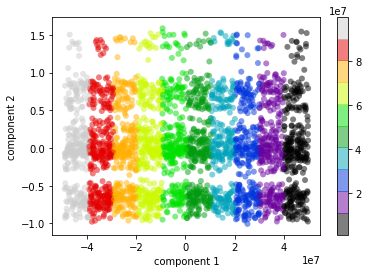

In [21]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=prep_dummies_df.AMOUNT, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()